In [1]:
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
# import theano.tensor as tt

%pylab inline
%config InlineBackend.figure_format = 'retina'

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Marginal Likilihood

$$
p(y | Model) = \int p(y | \theta, Model)p(\theta| Model)d\theta
$$

In [2]:
# Observed Data
k = 2
n = 10
# Prior parameters for Beta
alpha = beta = 1

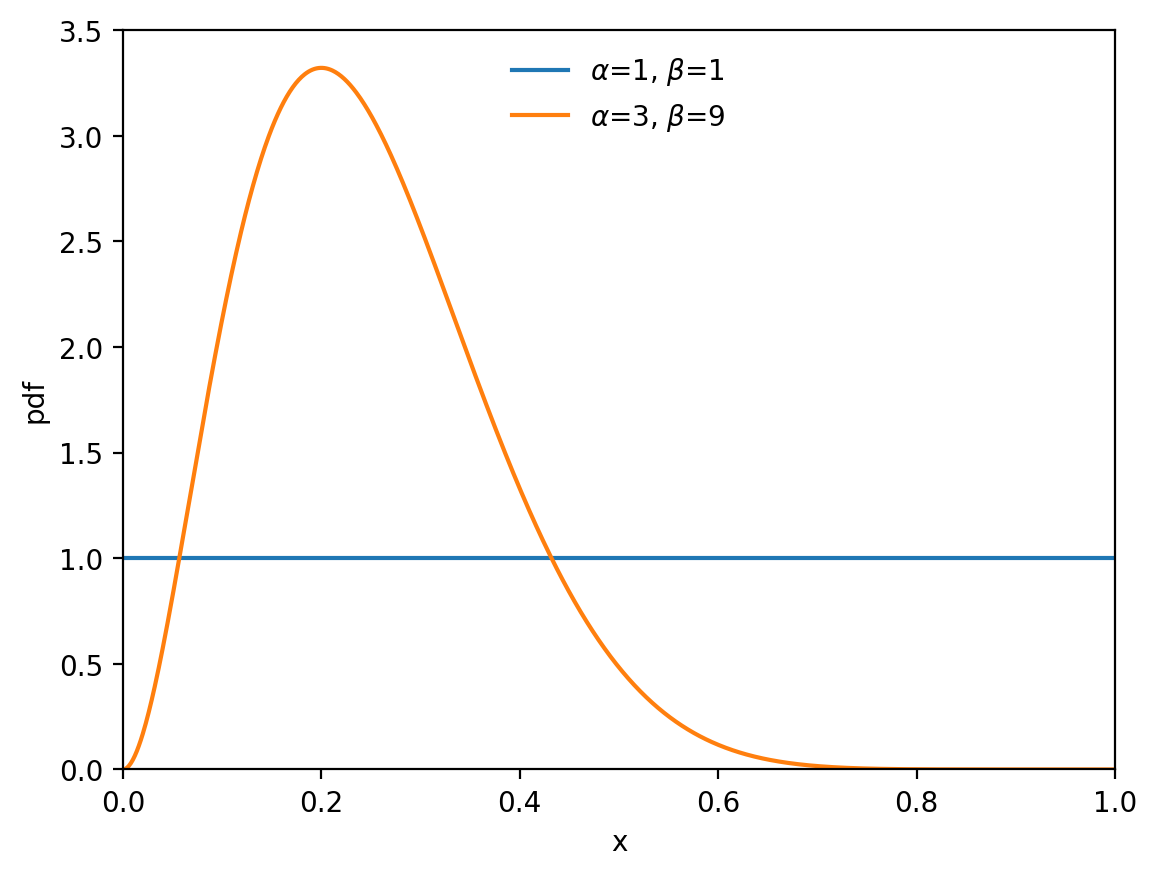

In [3]:
x = np.linspace(0.0, 1.0, 1000)
f = lambda a, b : st.beta.pdf(x, a, b)

fig, ax = plt.subplots()
plot_pdf = lambda a, b : ax.plot(x, f(a,b), label=r'$\alpha$={0}, $\beta$={1}'.format(a,b))
plot_pdf(alpha, beta)
plot_pdf(k+alpha, n-k+beta)
plt.legend(loc='upper center', frameon=False)
ax.set(xlim=[0,1], ylim=[0,3.5], xlabel='x', ylabel='pdf')
plt.show()

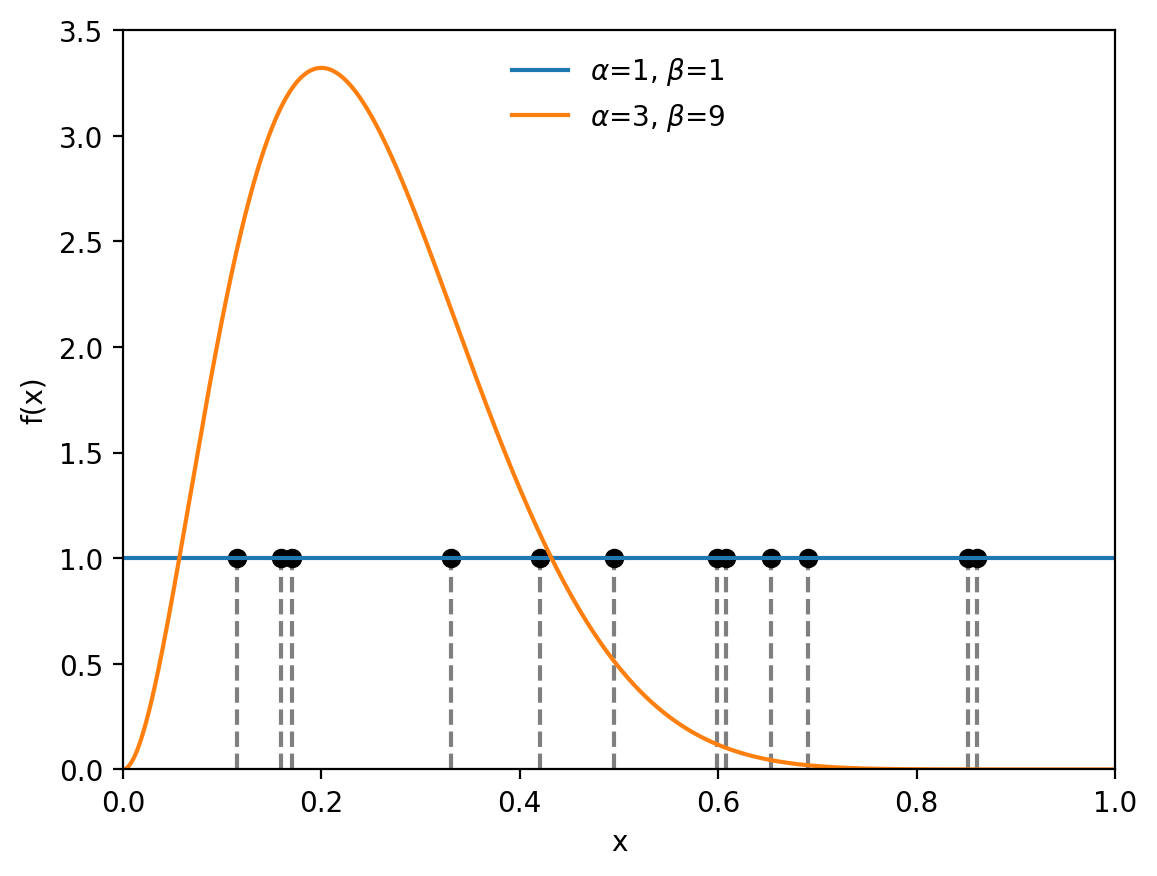

The Naive Monte Carlo Estimation is 0.09791


In [4]:
N=12
prior_samples = st.beta.rvs(alpha, beta, size=N)

fig, ax = plt.subplots()
betap = st.beta.pdf(prior_samples, alpha, beta)
ax.plot(prior_samples, betap, 'ko')
ax.plot([prior_samples, prior_samples],
        [np.zeros_like(betap), betap], 'k--', alpha=.5)

plot_pdf(alpha, beta)
plot_pdf(k+alpha, n-k+beta)
plt.legend(loc='upper center', frameon=False)
ax.set(xlim=[0, 1], ylim=[0, 3.5], xlabel='x', ylabel='f(x)')
plt.show()

m_l_n = st.binom.pmf(k, n, p=prior_samples).mean()
print('The Naive Monte Carlo Estimation is %.5f'%(m_l_n))

In [5]:
# Set up PyMC3 model
with pm.Model() as BB:
    p = pm.Beta('p', alpha=1., beta=1., transform=None)
    obs = pm.Binomial('obs', p=p, n=n, observed=k)

/Users/uliraudales/Desktop/Research/IFT/IFT_Code/.venv/lib/python3.11/site-packages/pymc/model/core.py:1460: UserWarning: To disable default transform, please use default_transform=None instead of transform=None. Setting transform to None will not have any effect in future.
  warnings.warn(
